In [45]:
# 1. Load the data into the pandas environment and identify some basic details of the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [46]:
data=pd.read_csv("employee.csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [47]:
data.shape

(9, 7)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [49]:
# 2. Reset the index as "name".

#data1=pd.read_csv("employee.csv", index_col="name")
#data1
df = pd.DataFrame(data,columns=['name','age','income','gender','department','grade','performance_score'])
df.set_index("name", inplace = True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [50]:
# 3. Select rows for specific names Jack Morgan and Josh wills.

data1 = df.loc[["Jack Morgan", "Josh Wills"]]
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [51]:
# 4. Select data for multiple values "Sales" and “Finance”.

data[data['department'].isin(["Sales","Finance"])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [52]:
# 5. Display employee who has more than 700 performance score.

data2=data[data["performance_score"]>700]["name"]
print('Employees who has more than 700 performance score is :\n ', data2)


Employees who has more than 700 performance score is :
  0      Allen Smith
4    Dheeraj Patel
7       Josh Wills
8         Leo Duck
Name: name, dtype: object


In [53]:
# 6. Display employee who has more than 500 and less than 700 performance score

data[(data["performance_score"]>500) & (data["performance_score"]< 700)] ["name"]

1          S Kumar
2      Jack Morgan
3        Ying Chin
5    Satyam Sharma
Name: name, dtype: object

In [54]:
# 7. Check and handle missing values in the dataset.

data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [55]:
data['age']=data['age'].fillna(data['age'].median())
data['income']=data['income'].fillna(data['income'].median())
data['gender']=data['gender'].fillna(data['gender'].mode().loc[0])
print("Age :\n " ,data['age'])
print("Income: \n",data['income'])
print("Gender : \n",data['gender'])

Age :
  0    45.0
1    45.0
2    32.0
3    45.0
4    30.0
5    45.0
6    54.0
7    54.0
8    23.0
Name: age, dtype: float64
Income: 
 0    52000.0
1    16000.0
2    35000.0
3    65000.0
4    42000.0
5    62000.0
6    52000.0
7    52000.0
8    98000.0
Name: income, dtype: float64
Gender : 
 0    F
1    F
2    M
3    F
4    F
5    F
6    F
7    F
8    M
Name: gender, dtype: object


In [56]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [57]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Text(0.5, 1.0, 'Box Plot of performance score ')

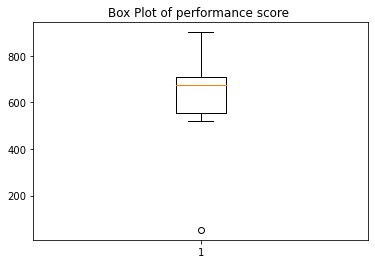

In [58]:
# 8. Check the outliers and handle outliers in performance score using Percentiles

plt.boxplot(data['performance_score'])
plt.title('Box Plot of performance score ')

In [64]:
#Percentile calculation
Q1= np.percentile(data['performance_score'],25)
Q3= np.percentile(data['performance_score'],75)
IQR=Q3-Q1
low_lmt = Q1-1.5*IQR
up_lmt = Q3+1.5*IQR
outlier=[]
for i in data['performance_score']:
    if((i<low_lmt) or (i>up_lmt)):
        outlier.append(i)
print("First Quartile :", Q1)
print("Third Quartile :", Q3)
print("IQR :", IQR)
print("Lower limit :",low_lmt)
print("Upper limit :",up_lmt)
print("Outlier is :", outlier)

First Quartile : 556.0
Third Quartile : 711.0
IQR : 155.0
Lower limit : 323.5
Upper limit : 943.5
Outlier is : [53]


In [65]:
# 9. Check the gender column and do Dummy encoding

data3= pd.get_dummies(data, columns=['gender'])
data3.head()

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,1,0
1,S Kumar,45.0,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0


In [66]:
# 10.Do the standard scaling on the feature performance score.

from sklearn import preprocessing
output= pd.DataFrame(data['performance_score'])
standardisation = preprocessing.StandardScaler()
std_out= standardisation.fit_transform(output)
output.head()

,performance_score
0,723
1,520
2,674
3,556
4,711


In [67]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   performance_score  9 non-null      int64
dtypes: int64(1)
memory usage: 200.0 bytes


In [68]:
output.describe()

,performance_score
count,9.000000
mean,610.666667
std,235.671912
min,53.000000
25%,556.000000
50%,674.000000
75%,711.000000
max,901.000000
